# AI genereate task
***
<b>Load and Merge Data:</b>
<br>
Load three CSV files (customers.csv, orders.csv, order_details.csv).<br>
Merge the data by customer_id and order_id to create a complete DataFrame.<br>
Make sure the merged DataFrame contains all necessary columns (you can choose to use inner join or left join, depending on how you think you can retain the most useful data).<br>
Output the first 5 rows of the merged DataFrame and confirm the data structure with .info().<br>

<b>Clean the Data:</b><br>
Handle missing values:<br>
In the email column, if missing, fill in "unknown@email.com".<br>
In the total_amount column, fill in the total amount of order_details corresponding to the order_id (the sum of quantity × unit_price).<br>
Normalize product_category, converting all values to title case (e.g., "electronics" → "Electronics").<br>
Check and remove any duplicate rows.<br>
Convert order_date to datetime format.<br>
Check quantity and unit_price for negative values, if so, remove the row (negative numbers don't make sense in this context).<br>
Output the cleaned-up summary of missing values (using .isnull().sum()).<br>

<b>Analyze the Data:</b><br>
Calculate the total sales for each region (the sum of total_amount).<br>
Find the product_category with the highest sales.<br>
Calculate the number of orders and average sales for each payment_method.<br>
Output the results (can be displayed using print()).<br>

<b>Visualize the Data:</b><br>
Use Pandas' built-in plotting capabilities (based on Matplotlib) to draw a bar chart showing the total sales for each region.<br>
Make sure the chart has a title ("Total Sales by Region"), an x-axis label ("Region"), and a y-axis label ("Total Sales (USD)").<br>

<b>Save Results:</b><br>
Save the cleaned DataFrame as cleaned_ecommerce_data.csv.<br>
Save the region total sales analysis results as region_sales_summary.csv.<br>

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [143]:
order_details = pd.read_csv('./order_details.csv')
customers = pd.read_csv('./customers.csv')
orders = pd.read_csv('./orders.csv')

In [144]:
def check_and_remove_duplicate(df,df_name):
    #check duiplicates
    duplicate_count = df.duplicated().sum()
    print( f'{df_name} duplicated rows :{duplicate_count}')

    #show duplicated row(if any)
    if duplicate_count > 0:
        print(f'{df_name} duplicated data:')
        print(df[df.duplicated(keep=False)])

    #remove duplicated row(if any)
    df_cleaned = df.drop_duplicates()

    #check after removed duplicated rows data
    duplicate_count_after = df_cleaned.duplicated().sum()
    print(f'{df_name} duplicated rows(after):{duplicate_count_after}')
    print(f'{df_name} data after removed duplicated rows:')
    print(df_cleaned.info())
    print('\n')

    return df_cleaned

In [145]:
cleaned_order_details = check_and_remove_duplicate(order_details,'order_details.csv')

order_details.csv duplicated rows :0
order_details.csv duplicated rows(after):0
order_details.csv data after removed duplicated rows:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          51 non-null     object 
 1   product_id        51 non-null     object 
 2   product_category  51 non-null     object 
 3   quantity          51 non-null     int64  
 4   unit_price        51 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 2.1+ KB
None




In [146]:
cleaned_orders = check_and_remove_duplicate(orders,'orders.csv')

orders.csv duplicated rows :0
orders.csv duplicated rows(after):0
orders.csv data after removed duplicated rows:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        30 non-null     object 
 1   customer_id     30 non-null     object 
 2   order_date      30 non-null     object 
 3   total_amount    24 non-null     float64
 4   payment_method  30 non-null     object 
dtypes: float64(1), object(4)
memory usage: 1.3+ KB
None




In [147]:
cleaned_orders['order_date'] = pd.to_datetime(cleaned_orders['order_date'])

In [148]:
cleaned_customers = check_and_remove_duplicate(customers,'customers.csv')

customers.csv duplicated rows :1
customers.csv duplicated data:
  customer_id customer_name email region
1        C002    Alice Wong   NaN  South
5        C002    Alice Wong   NaN  South
customers.csv duplicated rows(after):0
customers.csv data after removed duplicated rows:
<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 0 to 20
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    20 non-null     object
 1   customer_name  20 non-null     object
 2   email          17 non-null     object
 3   region         20 non-null     object
dtypes: object(4)
memory usage: 800.0+ bytes
None




In [149]:
customers.to_csv('cleaned_customers.csv', index =False)

In [150]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    21 non-null     object
 1   customer_name  21 non-null     object
 2   email          17 non-null     object
 3   region         21 non-null     object
dtypes: object(4)
memory usage: 804.0+ bytes


# Handling Missing Value First

In [151]:
#In the email column, if missing, fill in "unknown@email.com".

In [152]:
cleaned_customers.loc[:,'email'].fillna('unknown@email.com')

0         john.doe@email.com
1          unknown@email.com
2         bob.chan@email.com
3         mary.lee@email.com
4           tom.ng@email.com
6        susan.lau@email.com
7          unknown@email.com
8        emma.chan@email.com
9        peter.lam@email.com
10        linda.so@email.com
11      james.wong@email.com
12         unknown@email.com
13    michael.chan@email.com
14      amy.cheung@email.com
15      steven.yip@email.com
16       clara.mak@email.com
17       henry.lau@email.com
18        janet.ng@email.com
19       victor.li@email.com
20     rebecca.tam@email.com
Name: email, dtype: object

In [153]:
cleaned_customers.loc[:,'email']=customers.loc[:,'email'].fillna('unknown@email.com')


In [154]:
cleaned_customers

,customer_id,customer_name,email,region
0,C001,John Doe,john.doe@email.com,North
1,C002,Alice Wong,unknown@email.com,South
2,C003,Bob Chan,bob.chan@email.com,East
3,C004,Mary Lee,mary.lee@email.com,West
4,C005,Tom Ng,tom.ng@email.com,North
6,C006,Susan Lau,susan.lau@email.com,East
7,C007,David Ho,unknown@email.com,West
8,C008,Emma Chan,emma.chan@email.com,South
9,C009,Peter Lam,peter.lam@email.com,North
10,C010,Linda So,linda.so@email.com,East


In [155]:
#In the total_amount column, fill in the total amount of order_details corresponding to the order_id (the sum of quantity × unit_price).
#Normalize product_category, converting all values to title case (e.g., "electronics" → "Electronics").

In [156]:
def fill_missing_total_amount(orders, order_details):
    
    details = cleaned_order_details.copy()
    orders_copy = cleaned_orders.copy()
    details['amount'] = details['quantity'] * details['unit_price']
    order_totals = details.groupby('order_id')['amount'].sum().reset_index()
    
    
    for idx, row in orders_copy.iterrows():
        if pd.isna(row['total_amount']):  # only fill missing total_amount
            order_id = row['order_id']
            # find order_id's total
            total = order_totals[order_totals['order_id'] == order_id]['amount']
            if not total.empty:  # ensure there is relative value
                orders_copy.at[idx, 'total_amount'] = total.values[0]
    
    return orders_copy

In [157]:
fill_missing_total_amount(orders, order_details)

,order_id,customer_id,order_date,total_amount,payment_method
0,O001,C001,2025-01-01,130.0,Credit Card
1,O002,C002,2025-01-02,90.0,PayPal
2,O003,C003,2025-01-03,50.0,Credit Card
3,O004,C004,2025-01-04,50.0,Bank Transfer
4,O005,C005,2025-01-05,120.0,Credit Card
5,O006,C006,2025-01-06,120.0,PayPal
6,O007,C007,2025-01-07,100.0,Credit Card
7,O008,C002,2025-01-08,40.0,Bank Transfer
8,O009,C008,2025-01-09,150.0,Credit Card
9,O010,C009,2025-01-10,150.0,PayPal


In [158]:
cleaned_orders = fill_missing_total_amount(orders, order_details)

In [159]:
cleaned_orders

,order_id,customer_id,order_date,total_amount,payment_method
0,O001,C001,2025-01-01,130.0,Credit Card
1,O002,C002,2025-01-02,90.0,PayPal
2,O003,C003,2025-01-03,50.0,Credit Card
3,O004,C004,2025-01-04,50.0,Bank Transfer
4,O005,C005,2025-01-05,120.0,Credit Card
5,O006,C006,2025-01-06,120.0,PayPal
6,O007,C007,2025-01-07,100.0,Credit Card
7,O008,C002,2025-01-08,40.0,Bank Transfer
8,O009,C008,2025-01-09,150.0,Credit Card
9,O010,C009,2025-01-10,150.0,PayPal


In [160]:
cleaned_order_details.loc[:,'product_category'] = cleaned_order_details['product_category'].replace('electronics','Electronics')

In [161]:
cleaned_order_details.loc[:,'product_category']

0     Electronics
1        Clothing
2            home
3     Electronics
4        Clothing
5            Home
6        clothing
7     Electronics
8            home
9     Electronics
10       Clothing
11           Home
12    Electronics
13           home
14       Clothing
15    Electronics
16           Home
17       Clothing
18    Electronics
19           home
20       Clothing
21    Electronics
22       Clothing
23           Home
24    Electronics
25           Home
26    Electronics
27       Clothing
28           Home
29       Clothing
30    Electronics
31           home
32       Clothing
33       Clothing
34    Electronics
35    Electronics
36           home
37       Clothing
38    Electronics
39           Home
40           home
41    Electronics
42       Clothing
43       Clothing
44           home
45           Home
46       Clothing
47    Electronics
48           home
49       Clothing
50    Electronics
Name: product_category, dtype: object

In [162]:
cleaned_order_details['product_category'] = order_details['product_category'].str.title()

In [163]:
cleaned_order_details['product_category']

0     Electronics
1        Clothing
2            Home
3     Electronics
4        Clothing
5            Home
6        Clothing
7     Electronics
8            Home
9     Electronics
10       Clothing
11           Home
12    Electronics
13           Home
14       Clothing
15    Electronics
16           Home
17       Clothing
18    Electronics
19           Home
20       Clothing
21    Electronics
22       Clothing
23           Home
24    Electronics
25           Home
26    Electronics
27       Clothing
28           Home
29       Clothing
30    Electronics
31           Home
32       Clothing
33       Clothing
34    Electronics
35    Electronics
36           Home
37       Clothing
38    Electronics
39           Home
40           Home
41    Electronics
42       Clothing
43       Clothing
44           Home
45           Home
46       Clothing
47    Electronics
48           Home
49       Clothing
50    Electronics
Name: product_category, dtype: object

In [164]:
# Check quantity and unit_price for negative values, if so, remove the row (negative numbers don't make sense in this context)

In [165]:
print( 'negative checking')
print('negative check for quantity:',(cleaned_order_details['quantity']<0).sum())
print('negative check for unit_price:',(cleaned_order_details['unit_price']<0).sum())

negative checking
negative check for quantity: 0
negative check for unit_price: 0


In [166]:
#Analyze the Data

In [167]:
def analyze_sales(cleaned_customers, cleaned_orders, cleaned_order_details):
    # 1. merge customers & orders
    merged_df = pd.merge(cleaned_orders, cleaned_customers[['customer_id', 'region']], 
                        on='customer_id', how='left')
    
    # 2. Region total sales
    region_sales = merged_df.groupby('region')['total_amount'].sum().round(2)
    
    # 3. product_category total sales
    details_df = cleaned_order_details.copy()
    details_df['amount'] = order_details['quantity'] * details_df['unit_price']
    category_sales = details_df.groupby('product_category')['amount'].sum().round(2)
    top_category = category_sales.idxmax(), category_sales.max()
    
    # 4. the number of every payment method &the average sales of every payment method
    payment_stats = cleaned_orders.groupby('payment_method').agg(
        order_count=('order_id', 'count'),
        avg_sales=('total_amount', 'mean')
    ).round(2)
    
    # 5. result
    print("1. Region total sales (USD):")
    print(region_sales)
    print("\n2. the highest total sales Product Category:")
    print(f"Category: {top_category[0]}, Total Sales: ${top_category[1]}")
    print("\n3. The number of every payment method & the average sales of every payment method:")
    print(payment_stats)
    
    return merged_df,region_sales, category_sales, payment_stats

In [168]:
analyze_sales(cleaned_customers, cleaned_orders, cleaned_order_details)

1. Region total sales (USD):
region
East      530.0
North     830.0
South    1020.0
West      530.0
Name: total_amount, dtype: float64

2. the highest total sales Product Category:
Category: Electronics, Total Sales: $1490.0

3. The number of every payment method & the average sales of every payment method:
                order_count  avg_sales
payment_method                        
Bank Transfer             7      60.00
Credit Card              15      92.00
PayPal                    8     138.75


(   order_id customer_id order_date  total_amount payment_method region
 0      O001        C001 2025-01-01         130.0    Credit Card  North
 1      O002        C002 2025-01-02          90.0         PayPal  South
 2      O003        C003 2025-01-03          50.0    Credit Card   East
 3      O004        C004 2025-01-04          50.0  Bank Transfer   West
 4      O005        C005 2025-01-05         120.0    Credit Card  North
 5      O006        C006 2025-01-06         120.0         PayPal   East
 6      O007        C007 2025-01-07         100.0    Credit Card   West
 7      O008        C002 2025-01-08          40.0  Bank Transfer  South
 8      O009        C008 2025-01-09         150.0    Credit Card  South
 9      O010        C009 2025-01-10         150.0         PayPal  North
 10     O011        C010 2025-01-11          70.0    Credit Card   East
 11     O012        C011 2025-01-12          80.0  Bank Transfer   West
 12     O013        C012 2025-01-13         210.0         PayPal

In [169]:
merged_df,region_sales, category_sales, payment_stats = analyze_sales(customers, orders, order_details)

1. Region total sales (USD):
region
East     310.0
North    680.0
South    590.0
West     530.0
Name: total_amount, dtype: float64

2. the highest total sales Product Category:
Category: Clothing, Total Sales: $1020.0

3. The number of every payment method & the average sales of every payment method:
                order_count  avg_sales
payment_method                        
Bank Transfer             7      60.00
Credit Card              15      91.43
PayPal                    8     103.33


In [170]:
merged_df

,order_id,customer_id,order_date,total_amount,payment_method,region
0,O001,C001,2025-01-01,130.0,Credit Card,North
1,O002,C002,2025-01-02,NaN,PayPal,South
2,O002,C002,2025-01-02,NaN,PayPal,South
3,O003,C003,2025-01-03,50.0,Credit Card,East
4,O004,C004,2025-01-04,50.0,Bank Transfer,West
5,O005,C005,2025-01-05,120.0,Credit Card,North
6,O006,C006,2025-01-06,NaN,PayPal,East
7,O007,C007,2025-01-07,100.0,Credit Card,West
8,O008,C002,2025-01-08,40.0,Bank Transfer,South
9,O008,C002,2025-01-08,40.0,Bank Transfer,South


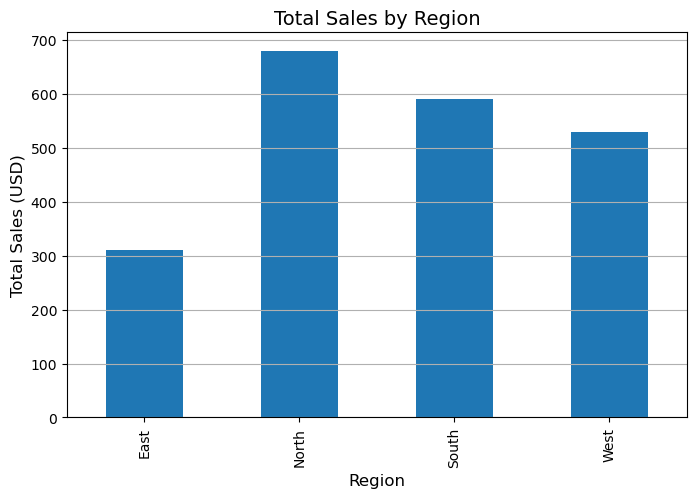

In [171]:
region_sales.plot(kind='bar', title='Total Sales by Region', figsize=(8, 5))
plt.title('Total Sales by Region', fontsize=14)
plt.xlabel('Region', fontsize = 12)
plt.ylabel('Total Sales (USD)', fontsize =12)
plt.grid(True, axis='y')
plt.savefig('Total Sales by Region.png')
plt.show()

In [180]:
cleaned_orders.to_csv('cleaned_orders.csv',index =False)
cleaned_order_details.to_csv('clean_order_details.csv',index = False)
cleaned_customers.to_csv('clean_customers.csv', index = False)
merged_df.to_csv('cleaned_ecommerce_data.csv', index = False)
region_sales.to_csv('region_sales_summary.csv', index = True)
payment_stats.to_csv('payment_stats.csv', index = True)
category_sales.to_csv('category_sales.csv', index=True)